In [1]:
import pandas as pd
df = pd.read_csv('Bank_Personal_Loan_Modelling-1.csv')
df.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [60]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [91]:
# Statistical analysis:-
#ID: Also, customer ID won't pay any relevance in identifying a potential personal loan customer hence this column can also be 
#    dropped during model building.
#Age: The mean & median of age falls around 45, hence most customers are mid-aged & not too young & old, so they could be 
#     potentially looking for loan and have good time to repay the same.
#Experience: The min experience is appearing as negative which implies either an incorrect data therefore we can drop
#            all negative experience records
#Income: the min and max values are having a huge difference, also the mean & median are close which is not too low, hence it
#        could be deduced that customers have enough earnings to pay for loans
#Zip code: Mean & median appear quite close to each other, it could be deduced that most of these customers are living in 
#          nearby/or belong to locality which is not too away from each other
#Family: The mean & median indicate that most of the customers have a family size of 2 which is not too big & hence thay could
#        interested in taking loan with not too hesitation
#CCAvg: As the mean & median values on credit card spending is quite close & not too high as appear from the max value, hence 
#       it could be deduced that customers have enough saving that they could use for paying loan instalment
#Education: It appears that most of the population is fairly educated
#Mortgage: The values in this columns doesn't imply much about the customers as the mean value is much lower then the max, it
#          may be inferred that those customer who have taken mortage have taken it on a large volume
#Columns like Personal loan, Securities Account, CD account, Online,Creditcard doesn't have much data in them as been 
#          indicated by the statistical values in these columns

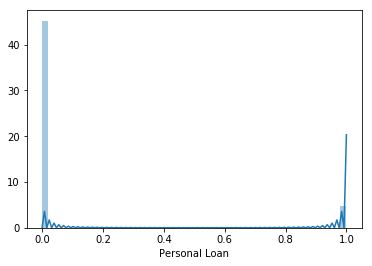

In [92]:
import seaborn as sns
tmp = df['Personal Loan']
sns.distplot(tmp)
# Looking into below plot it appears that a fair number of customers have not taken perfonal loan, compared with number of
# customers who have taken personal loan this number is quite high 

In [93]:
# Before splitting the data into test & training sets, we can get rid of column "ID" as it wont pose much relevance to the 
# output prediction, also, the experience column has negative values in it so we will get these values replace by the median of 
# column
#df['Plas']=df['Plas'].replace(0,df['Plas'].median())
import numpy as np
df1 = df.drop('ID',axis=1)
df1['Experience']=df1['Experience'].replace(df1['Experience']<0,df1['Experience'].median())

In [94]:
df1.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [95]:
from sklearn.model_selection import train_test_split
X = df1.drop('Personal Loan',axis =1)
y = df1['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 7)

# Logistic regression model

In [96]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [97]:
# make class predictions for the testing set
y_pred_class1 = lr.predict(X_test)

In [98]:
# calculate accuracy
from sklearn import metrics
print('Accuracy using logistic regression is:',metrics.accuracy_score(y_test, y_pred_class1))

Accuracy using logistic regression is: 0.918


# Naive Bayes model

In [99]:
from sklearn.naive_bayes import GaussianNB
gb = GaussianNB()
gb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [100]:
from sklearn.metrics import confusion_matrix
y_pred_class = gb.predict(X_test)
# calculate accuracy
print('The accuracy using naive bayes model is:',gb.score(X_test,y_test))

The accuracy using naive bayes model is: 0.88


# KNN model

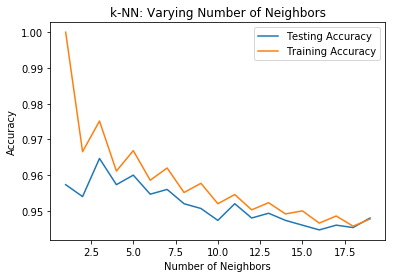

In [101]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import numpy as np
neighbors = np.arange(1, 20)
fn_plot = np.empty(len(neighbors))
train_accuracy_plot = np.empty(len(neighbors))
test_accuracy_plot = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
    fn = []
    train = []
    test = []
    for j in range(20):
        sc=StandardScaler()
        scaledX_train = sc.fit_transform(X_train)
        scaledX_test = sc.transform(X_test)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(scaledX_train,y_train)
        train.append(knn.score(scaledX_train,y_train))
        test.append(knn.score(scaledX_test,y_test))
    #Compute accuracy on the training set
    train_accuracy_plot[i] = np.mean(train)
    #Compute accuracy on the testing set
    test_accuracy_plot[i] = np.mean(test)
    predicted = knn.predict(scaledX_test)
    fn.append(confusion_matrix(y_test,predicted)[1,0])
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy_plot, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_plot, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [102]:
# Analysis of different models:
# Looking into the accuracies given out by 3 different models on the data, it appears that the accuracy of knn model is highest
# in both training & test set which is above 95 %.

# Confusion matrix for 3 models

In [103]:
# lets consider that value of 1 in personal loan implies laon taken, so the paramets to look for in confusion matrix is false
# negative values because if we predicted that some customer will not take loan & our prediction if false then that will lead to
# a missed opportuniy
from sklearn.metrics import confusion_matrix
# for knn model
predicted = knn.predict(scaledX_test)
confusion_matrix(y_test,predicted)

array([[1355,    7],
       [  71,   67]], dtype=int64)

In [104]:
# Confusion matrx for naive's bayes
confusion_matrix(y_test,y_pred_class)

array([[1238,  124],
       [  56,   82]], dtype=int64)

In [105]:
# confusion matrix for logistic regression model
confusion_matrix(y_test,y_pred_class1)

array([[1335,   27],
       [  96,   42]], dtype=int64)

In [106]:
# looking into the above 3 confusion matrices, it can be seen that the value of false negatives is minimum in case of naive's
# bayes model, although the accuracy of naive baye's is less then the other 2 models but it's still around 88 percent which is
# acceptable considering that the model predicts correctly compared to other 2 models, hence we should prefer naive's bayes 
# model in this case to predict whether a customer will take personal loan